In [1]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline 

# Parte 1

### Dados coletados:

O peso do conjunto (ausência de Becker) indicado pelo dinamometro foi de:

$$P = 0.87 \ N$$

Onde o dinamometro apresenta um erro $\sigma_P = 0.01 \ N$, visto que esta é metade da sua menor divisão da escala. 

Com o cilíndro totalmente imerso na água, a leitura do dinamômetro indicou um peso aparente de:

$$P_{ap} = (0.43 \pm 0.01) \ N$$

O empuxo causado pelo líquido pode ser medido através da diferença entre o peso real do aparato e seu peso aparente, ou seja:

$$E = P - P_{ap} =0.87-0.43 = 0.44 \ N$$

Sua incerteza pode ser calculada através da propagação de erros de ambas as medidas da seguinte forma:

$$\sigma_{E} = \sqrt{\sigma_P^2 + \sigma_{P_{ap}}^2}$$

Como ambas as incertezas são iguais a $0.01$ N:

$$\sigma_{E} = 0.01 \ \sqrt{2} = 1.41421356237 \ 10^{-2}$$

Arredondando para apenas um algarismo significativo:

$$\sigma_{E} = 0.01 \ N$$


Para que a força lida no dinamômetro se iguale ao peso do conjunto, foi necessário adicionar um volume $V_w = 46$ ml de água no cilíndro transparente. Tal volume foi medido através de uma proveta que apresenta um erro $\sigma_{V_w} = 1$ ml. O Peso de água colocado é:

$$P_{w} = m_{w} g$$

Como $m_{w} = \rho_{w}V_{w}$:

$$P_{w} = \rho_{w}V_{w} g$$

A incerteza do peso de água pode ser calculada através da propagação do erro na medida do volume:

$$\sigma_{P_w} = \sqrt{\left(\frac{\partial P_w}{\partial V_w}\right)^2\sigma_{V_w}^2}$$
$$\sigma_{P_w} = \sqrt{\left(\frac{\partial\rho_{w}V_{w} g }{\partial V_w}\right)^2\sigma_{V_w}^2}$$
$$\sigma_{P_w} = \sqrt{\left(\rho_{w} g\right)^2\sigma_{V_w}^2}$$
$$\sigma_{P_w} = \rho_{w} g\sigma_{V_w}$$

Utilizando que $\rho_w = 10^{-3}$ kg/ml, $V_w = (46 \pm 1)$ ml e $g = 9.8$ m/$s^2$:



In [2]:
p_w = 1e-3*46*9.8 #N

sigma_p_w = 1e-3*9.8*1
sigma_p_w = float('{:g}'.format(float('{:.1g}'.format(sigma_p_w))))

casas = str(sigma_p_w)[::-1].find('.')
p_w = np.round(p_w, casas)

print('P_w = (%.2f +- %.2f) N' %(p_w,sigma_p_w))



P_w = (0.45 +- 0.01) N


$$P_w = (0.45 \pm 0.01) \ N$$

Note que este valor coincide com $F_E = (0.44 \pm 0.01)$ N, quando consideramos suas incertezas. Como o volume do cilíndro transparente é o mesmo do maciço, então podemos dizer que o volume de água deslocado ao mergulharmos o cilíndro maciço é o mesmo que adicionamos para que a força medida seja igual ao peso do aparato. Além disto, vimos que o peso desse volume deslocado é igual ao valor da força de empuxo, o que verifica o princípio de Arquimedes

# Parte 2

A massa do cilíndro foi medida em uma balança com erro de $0.01$ g, a qual nos forneceu o seguinte valor:
    
$$m_c = (63.25\pm 0.01) \ g = (6.325\pm 0.001) \ 10^{-2} kg$$

Antes de mergulharmos o cilíndro maciço no Becker, a superfície do líquido estava na marca de $350$ ml e após a sua inserção o líquido subiu para a marca dos $400$ ml. Logo, o volume de líquido deslocado foi de:

$V_{ld} = V_f - V_0 = 400 - 350 = 50 \ ml$

Tendo em vista que a menor divisão da escala do Becke é $10$ ml, então a incerteza de $V_0$ e $V_f$ é de $5$ ml. Propagando este erro para $V_{ld}$

$$\sigma_{V_{ld}} = \sqrt{\sigma_{V_0}^2 + \sigma_{V_f}^2}$$

$$\sigma_{V_{ld}} = \sqrt{5^2 + 5^2}$$

$$\sigma_{V_{ld}} =5 \sqrt{2}$$

$$\sigma_{V_{ld}} =7.0710678118654755$$

Arredondando para apenas um algarismo significativo:

$$\sigma_{V_{ld}} =7 \ ml$$

Logo, o volume de líquido deslocado e sua incerteza é:

$$V_{ldb} = (50 \pm 7) \ \mu m^3$$





In [3]:
v_ld = 50e-6 #m^3
sigma_v_ld = 7e-6 #m^3


print('V_ld = (%.6f +- %.6f) m^3' % (v_ld,sigma_v_ld))


V_ld = (0.000050 +- 0.000007) m^3


O volume de líquido deslocado é:

$$V_{ld} = (50 \pm 7) \mu m^3$$

A força que provoca a aparente diminuição do peso é a diferença entre o peso do cilíndro e a força medida $P_{ap} = (0.18 \pm 0.01) \ N$:

$$E = P - P_{ap} = m_c g - P_{ap}$$


A incerteza pode ser calculada através da propagação dos erros de $m_c$ e $P_{ap}$:

$$\sigma_{E} = \sqrt{\left(\frac{\partial (m_c g - P_{ap})}{\partial m_c}\right)^2\sigma_{m_c}^2 + \left(\frac{\partial (m_c g - P_{ap})}{\partial P_{ap}}\right)^2\sigma_{P_{ap}}^2 }$$

$$\sigma_{E} = \sqrt{\left(g \sigma_{m_c}\right)^2 + \sigma_{P_{ap}}^2 }$$

In [4]:
m_c = 63.25/1000 #kg
sigma_m_c = 0.01/1000 #kg
g = 9.8 #m/s^2
p_ap = 0.18 #N
sigma_p_ap = 0.01 #N

empuxo = m_c*9.8 - p_ap

sigma_e = np.sqrt(np.power(g*sigma_m_c,2) + np.power(sigma_p_ap,2))
sigma_e = float('{:g}'.format(float('{:.1g}'.format(sigma_e))))

empuxo = np.round(empuxo,2)

print('E = (%.2f +- %.2f) N' % (empuxo,sigma_e))



E = (0.44 +- 0.01) N


Pelo princípio de Arquimedes, o qual foi verificado na primeira parte do experimento, nós temos que:
    
$$E = \rho_l V_{ld} g$$

$$\implies \rho_l = \frac{E}{V_{ld} g}$$

A incerteza associada a densidade pode ser obtida através da propagação dos erros do volume e empuxo:

$$\sigma_{\rho_l} = \sqrt{\left(\frac{\partial  \frac{E}{V_{ld} g}}{\partial E}\right)^2\sigma_{E}^2 + \left(\frac{\partial  \frac{E}{V_{ld} g}}{\partial V_{ld}}\right)^2\sigma_{V_{ld}}^2}$$

$$\sigma_{\rho_l} = \sqrt{\left( \frac{1}{V_{ld} g}\right)^2\sigma_{E}^2 + \left(  \frac{E}{V_{ld}^2 g}\right)^2\sigma_{V_{ld}}^2}$$

$$\sigma_{\rho_l} = \frac{E}{V_{ld} g}\sqrt{\left( \frac{\sigma_E}{E}\right)^2 + \left(\frac{\sigma_{V_{ld}}}{V_{ld}}\right)^2}$$

$$\sigma_{\rho_l} = \rho_l\sqrt{\left( \frac{\sigma_E}{E}\right)^2 + \left(\frac{\sigma_{V_{ld}}}{V_{ld}}\right)^2}$$

Utilizando os valores que calculamos anteriormente:

In [5]:

rho = empuxo/(v_ld*g)

sigma_rho = rho*np.sqrt(np.power(sigma_e/empuxo,2) + np.power(sigma_v_ld/v_ld,2))
sigma_rho  = float('{:g}'.format(float('{:.1g}'.format(sigma_rho ))))
rho = np.round(rho,-2)

print('rho = (%.0f +- %.0f) kg/m^3' % (rho,sigma_rho))

rho = (900 +- 100) kg/m^3


## Densidade do cilíndro


Como, pelo princípio da impenetrabilidade da matéira, o volume de líquido deslocado deve ser o mesmo que o volume submerso do corpo, então temos que:

$$V_c = (50 \pm 7) \ \mu m^3$$

Logo sua densidade será:

$$\rho_c = \frac{m_c}{V_c}$$

Propagando os erros da massa e do volume:

$$\sigma_{\rho_c} = \sqrt{\left(\frac{\partial \frac{m_c}{V_c}}{\partial m_c}\right)^2\sigma_{m_c}^2 +\left(\frac{\partial \frac{m_c}{V_c}}{\partial V_c}\right)^2\sigma_{V_c}^2 }$$

$$\sigma_{\rho_c} = \sqrt{\left( \frac{1}{V_c}\right)^2\sigma_{m_c}^2 +\left( \frac{m_c}{V_c^2}\right)^2\sigma_{V_c}^2 }$$

$$\sigma_{\rho_c} = \frac{m_c}{V_c}\sqrt{\left( \frac{\sigma_{m_c}}{m_c}\right)^2 +\left( \frac{\sigma_{V_c}}{V_c}\right)^2 }$$

$$\sigma_{\rho_c} = \rho_c\sqrt{\left( \frac{\sigma_{m_c}}{m_c}\right)^2 +\left( \frac{\sigma_{V_c}}{V_c}\right)^2 }$$

In [6]:
v_c = 50e-6 #m^3
sigma_V_c = 7e-6 #m^3
rho_c = m_c/v_c

sigma_rho_c = rho_c*np.sqrt(np.power(sigma_m_c/m_c,2) + np.power(sigma_V_c/v_c,2))
sigma_rho_c = float('{:g}'.format(float('{:.1g}'.format(sigma_rho_c))))

rho_c = np.round(rho_c,-2)
print('rho_c = (%.0f +- %.0f) kg/m^3' % (rho_c,sigma_rho_c))

rho_c = (1300 +- 200) kg/m^3


# Parte 3

Nós medimos o diâmetro e a altura do cilíndro e obtivemos que $d = 3.25 \ 10^{-2}$ m e $h = 7 \ 10^{-2}$ m. Onde ambos aperesentam um erro $\sigma_{regua} = 5 \ 10^{-4}$ m devido a medida ser realizada com uma régua. A área da base do cilíndo é dada pela seguinte expressão:

$$A = \frac{\pi d^2}{4}$$

Propagando o erro da medida do diâmetro:

$$\sigma_A = \sqrt{\left(\frac{\partial \frac{\pi d^2}{4}}{\partial d}\right)^2\sigma_d^2}$$

$$\sigma_A = \sqrt{\left( \frac{\pi d}{2}\right)^2\sigma_d^2}$$

$$\sigma_A =  \frac{\pi d}{2}\sigma_d$$

In [7]:
d = 3.25e-2 #m
sigma_regua = 5e-4 #m


area = (np.pi * (d**2))/4

sigma_area = (np.pi * d * sigma_regua)/2
sigma_area = float('{:g}'.format(float('{:.1g}'.format(sigma_area))))

area = np.round(area,5)
print('A = ( %.5f +- %.5f) m^2' % (area,sigma_area))


A = ( 0.00083 +- 0.00003) m^2


### Dados coletados

In [8]:
#Peso aparente e sua incerteza
p_ap3 = [0.62,0.55,0.51,0.45,0.38,0.32,0.27,0.20] #N
sigma_p_ap3 = np.full(len(p_ap3),0.01) #N

#altura e sua incerteza
h = np.array([0,1,2,3,4,5,6,7])/100 #m
sigma_h = np.full(len(h),5e-4) #m


### Gráfico com dados brutos

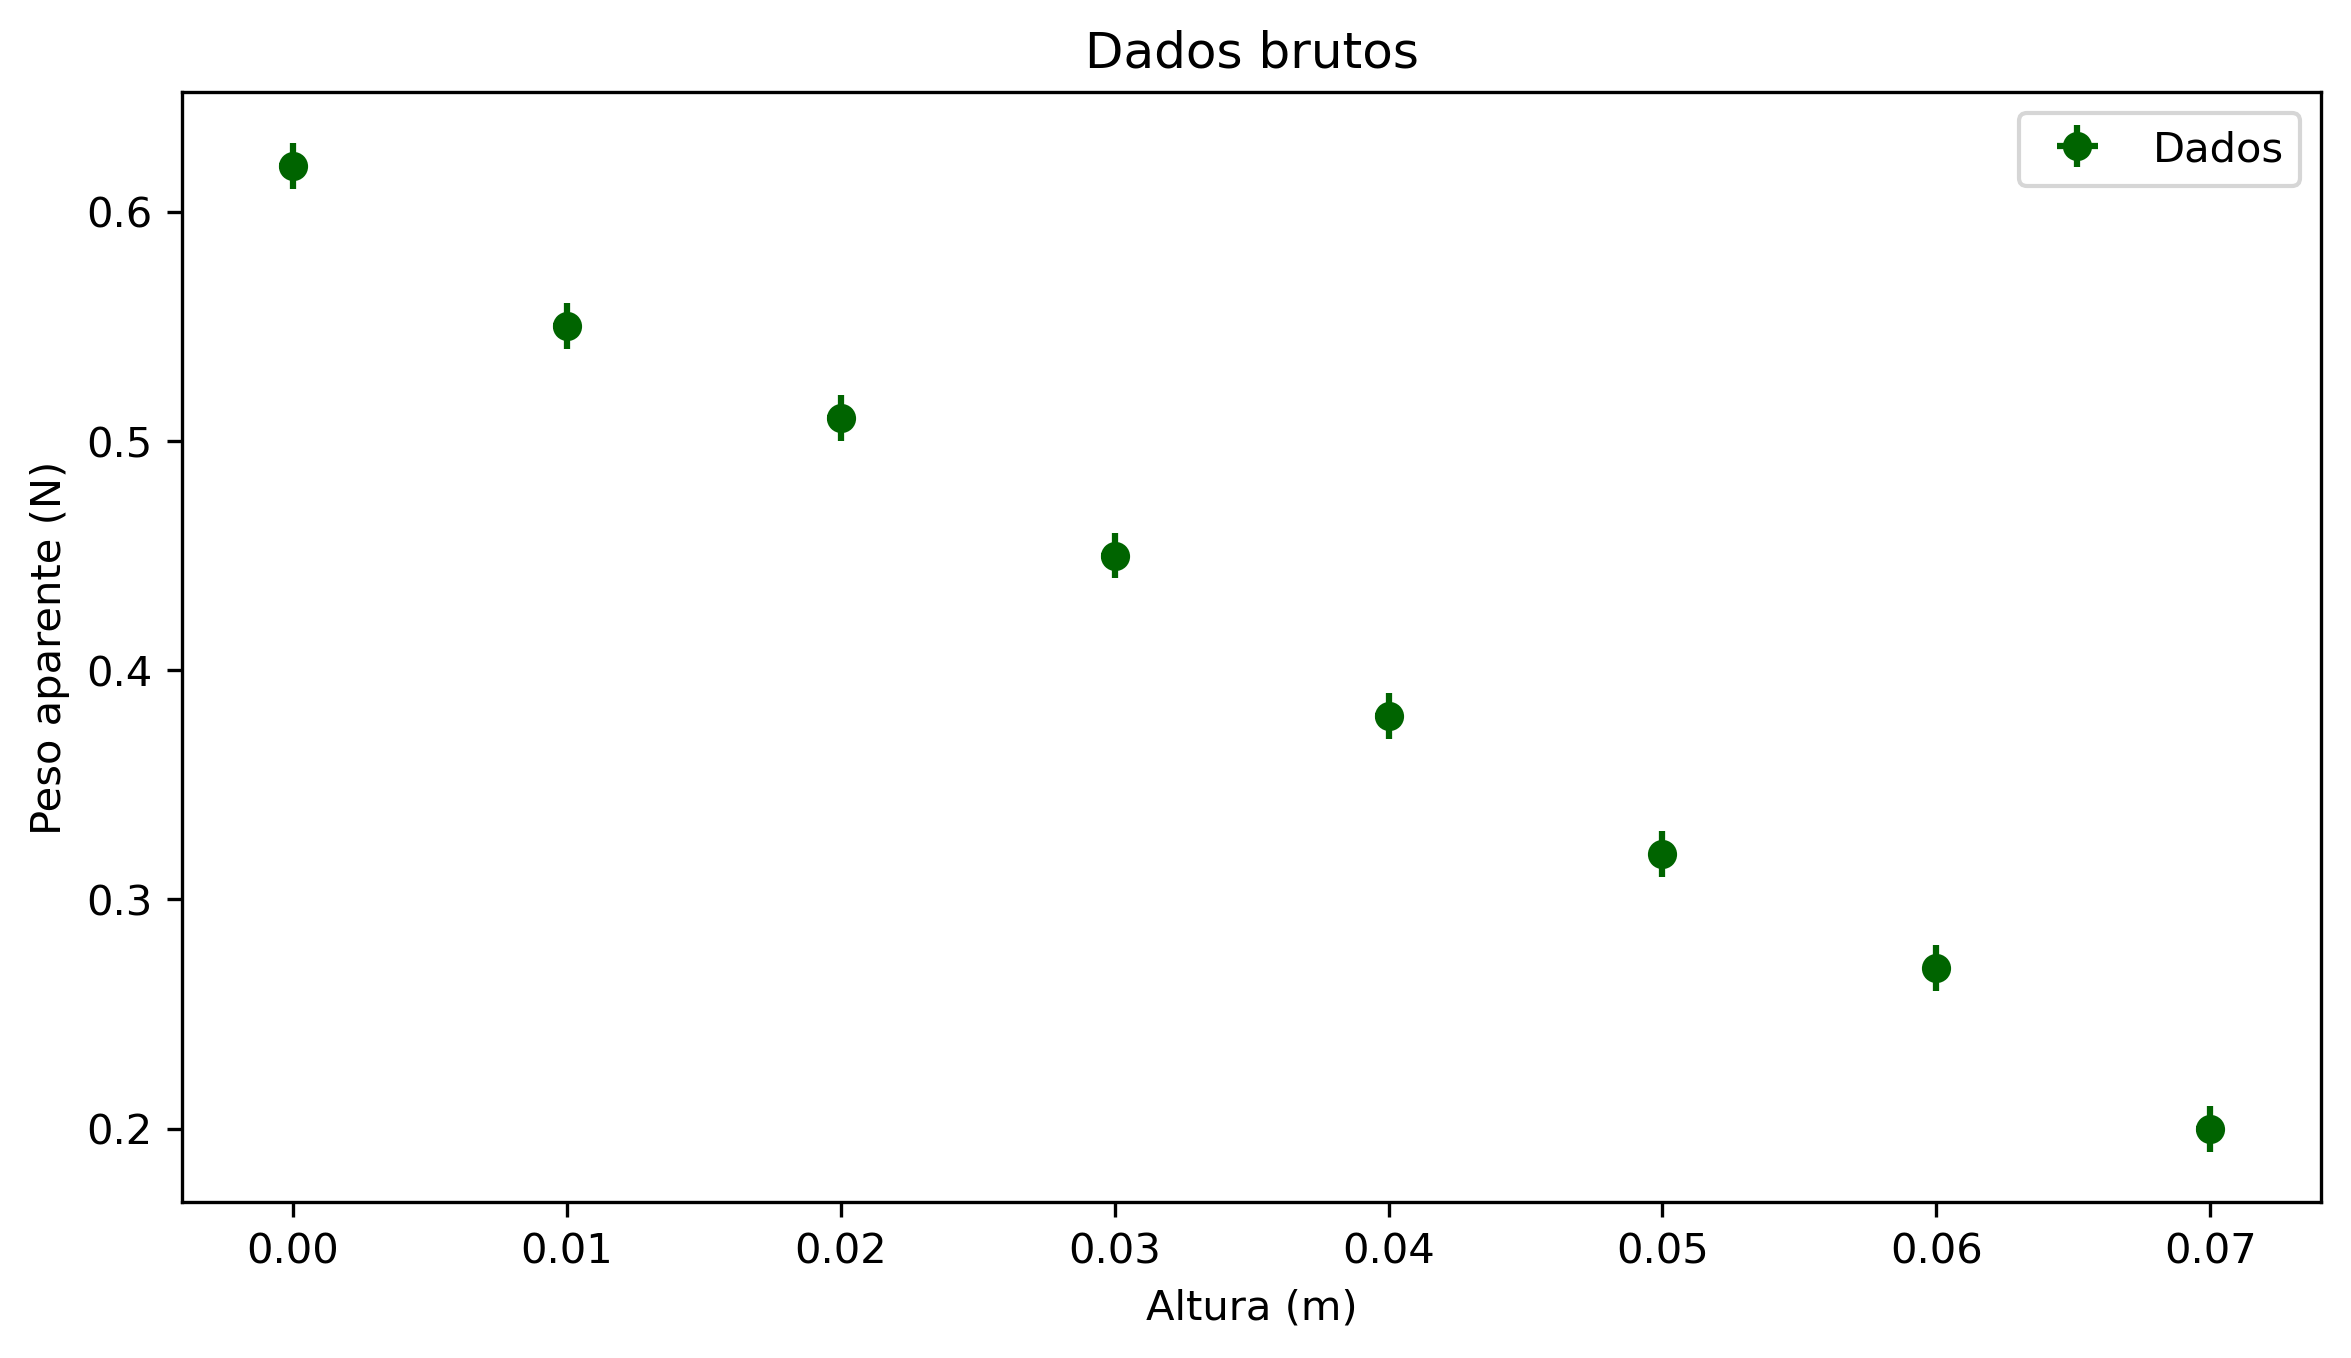

In [9]:
plt.figure(figsize = [9.2,4.9], dpi = 300) 
plt.errorbar(h,p_ap3,sigma_p_ap3,sigma_h, 'o', color = 'darkgreen', label = 'Dados')
plt.xlabel('Altura (m)')
plt.ylabel(r'Peso aparente (N)')
plt.title('Dados brutos')
plt.legend()
plt.savefig('Pxh_brutos.pdf', dpi =300)
plt.show()

## Transferência de incerteza (não dá pra fazer assim)

Nosso modelo teórico nos diz que:

$$P_{ap} =  m_c g - \rho A g  h$$

Como $m_c$ e $A$ apresentam erro, também devemos transferi-los para a incerteza do peso aparente. Logo:

$$\sigma'_{P_{ap}} = \sqrt{\sigma_{P_{ap}}^2 + \left(\sigma_{h}\frac{\partial P_{ap}}{\partial h}\right)^2 + \left(\frac{\partial P_{ap}}{\partial m_c}\right)^2\sigma_{m_c}^2 + \left(\frac{\partial P_{ap}}{\partial A}\right)^2\sigma_{A}^2}$$

Aqui $\frac{\partial P_{ap}}{\partial h}$ pode ser aproximado como o coeficiente angular da reta ajustada sobre os dados brutos.


$$\sigma'_{P_{ap}} = \sqrt{\sigma_{P_{ap}}^2 + \left(\sigma_{h}\frac{\partial P_{ap}}{\partial h}\right)^2 + \left(\frac{\partial (m_c g - \rho A g  h)}{\partial m_c}\right)^2\sigma_{m_c}^2 + \left(\frac{\partial (m_c g - \rho A g  h)}{\partial A}\right)^2\sigma_{A}^2}$$

$$\sigma'_{P_{ap}} = \sqrt{\sigma_{P_{ap}}^2 + \left(\sigma_{h}\frac{\partial P_{ap}}{\partial h}\right)^2 + \left( g \right)^2\sigma_{m_c}^2 + \left( \rho  g  h\right)^2\sigma_{A}^2}$$
$$\sigma'_{P_{ap}} = \sqrt{\sigma_{P_{ap}}^2 + \left(\sigma_{h}\frac{\partial P_{ap}}{\partial h}\right)^2 + \left( g \sigma_{m_c}\right)^2 + \left( \rho  g  h \sigma_{A}\right)^2}$$

## Transferência de incerteza

A tranferência de incerteza da altura para o peso aparente é dada pela seguinte expressão:

$$\sigma'_{P_{ap}} = \sqrt{\sigma_{P_{ap}}^2 + \left(\sigma_{h}\frac{\partial P_{ap}}{\partial h}\right)^2 }$$

Aqui $\frac{\partial P_{ap}}{\partial h}$ pode ser aproximado como o coeficiente angular da reta ajustada sobre os dados brutos.




In [10]:
#Realizando o fit sobre os dados brutos:

fit = np.polyfit(h, p_ap3,1)

sigma_p_ap3_transf = np.sqrt(np.power(sigma_p_ap3,2) + np.power(sigma_h*fit[0],2) )
sigma_p_ap3_transf = np.array([float('{:g}'.format(float('{:.1g}'.format(i)))) for i in sigma_p_ap3_transf])

print(sigma_p_ap3_transf)

[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]


## Calculando o ajuste através do método dos mínimos quadrados

In [11]:
fitpars, cov_pars = np.polyfit(h,p_ap3,1,w=np.power(sigma_p_ap3_transf,-1),cov='True')
poly1d_fn = np.poly1d(fitpars) 
#print(fitpars, cov_pars)

#Coeficientes da reta ajustada:
coef_angular = fitpars[0]
coef_linear = fitpars[1]
sigma_angular = np.sqrt(cov_pars[0][0])
sigma_linear = np.sqrt(cov_pars[1][1])


#Considerando apenas um algarismo significativo na incerteza:
sigma_angular = float('{:g}'.format(float('{:.1g}'.format(sigma_angular))))
sigma_linear = float('{:g}'.format(float('{:.1g}'.format(sigma_linear))))

                     
print('Coeficiente angular: %.1f +- %.1f (N/m)' % (coef_angular ,sigma_angular))
print('Coeficiente linear: %.3f +- %.3f (N)' %(coef_linear,sigma_linear))

Coeficiente angular: -5.9 +- 0.1 (N/m)
Coeficiente linear: 0.620 +- 0.005 (N)


## Gráfico contendo o ajuste

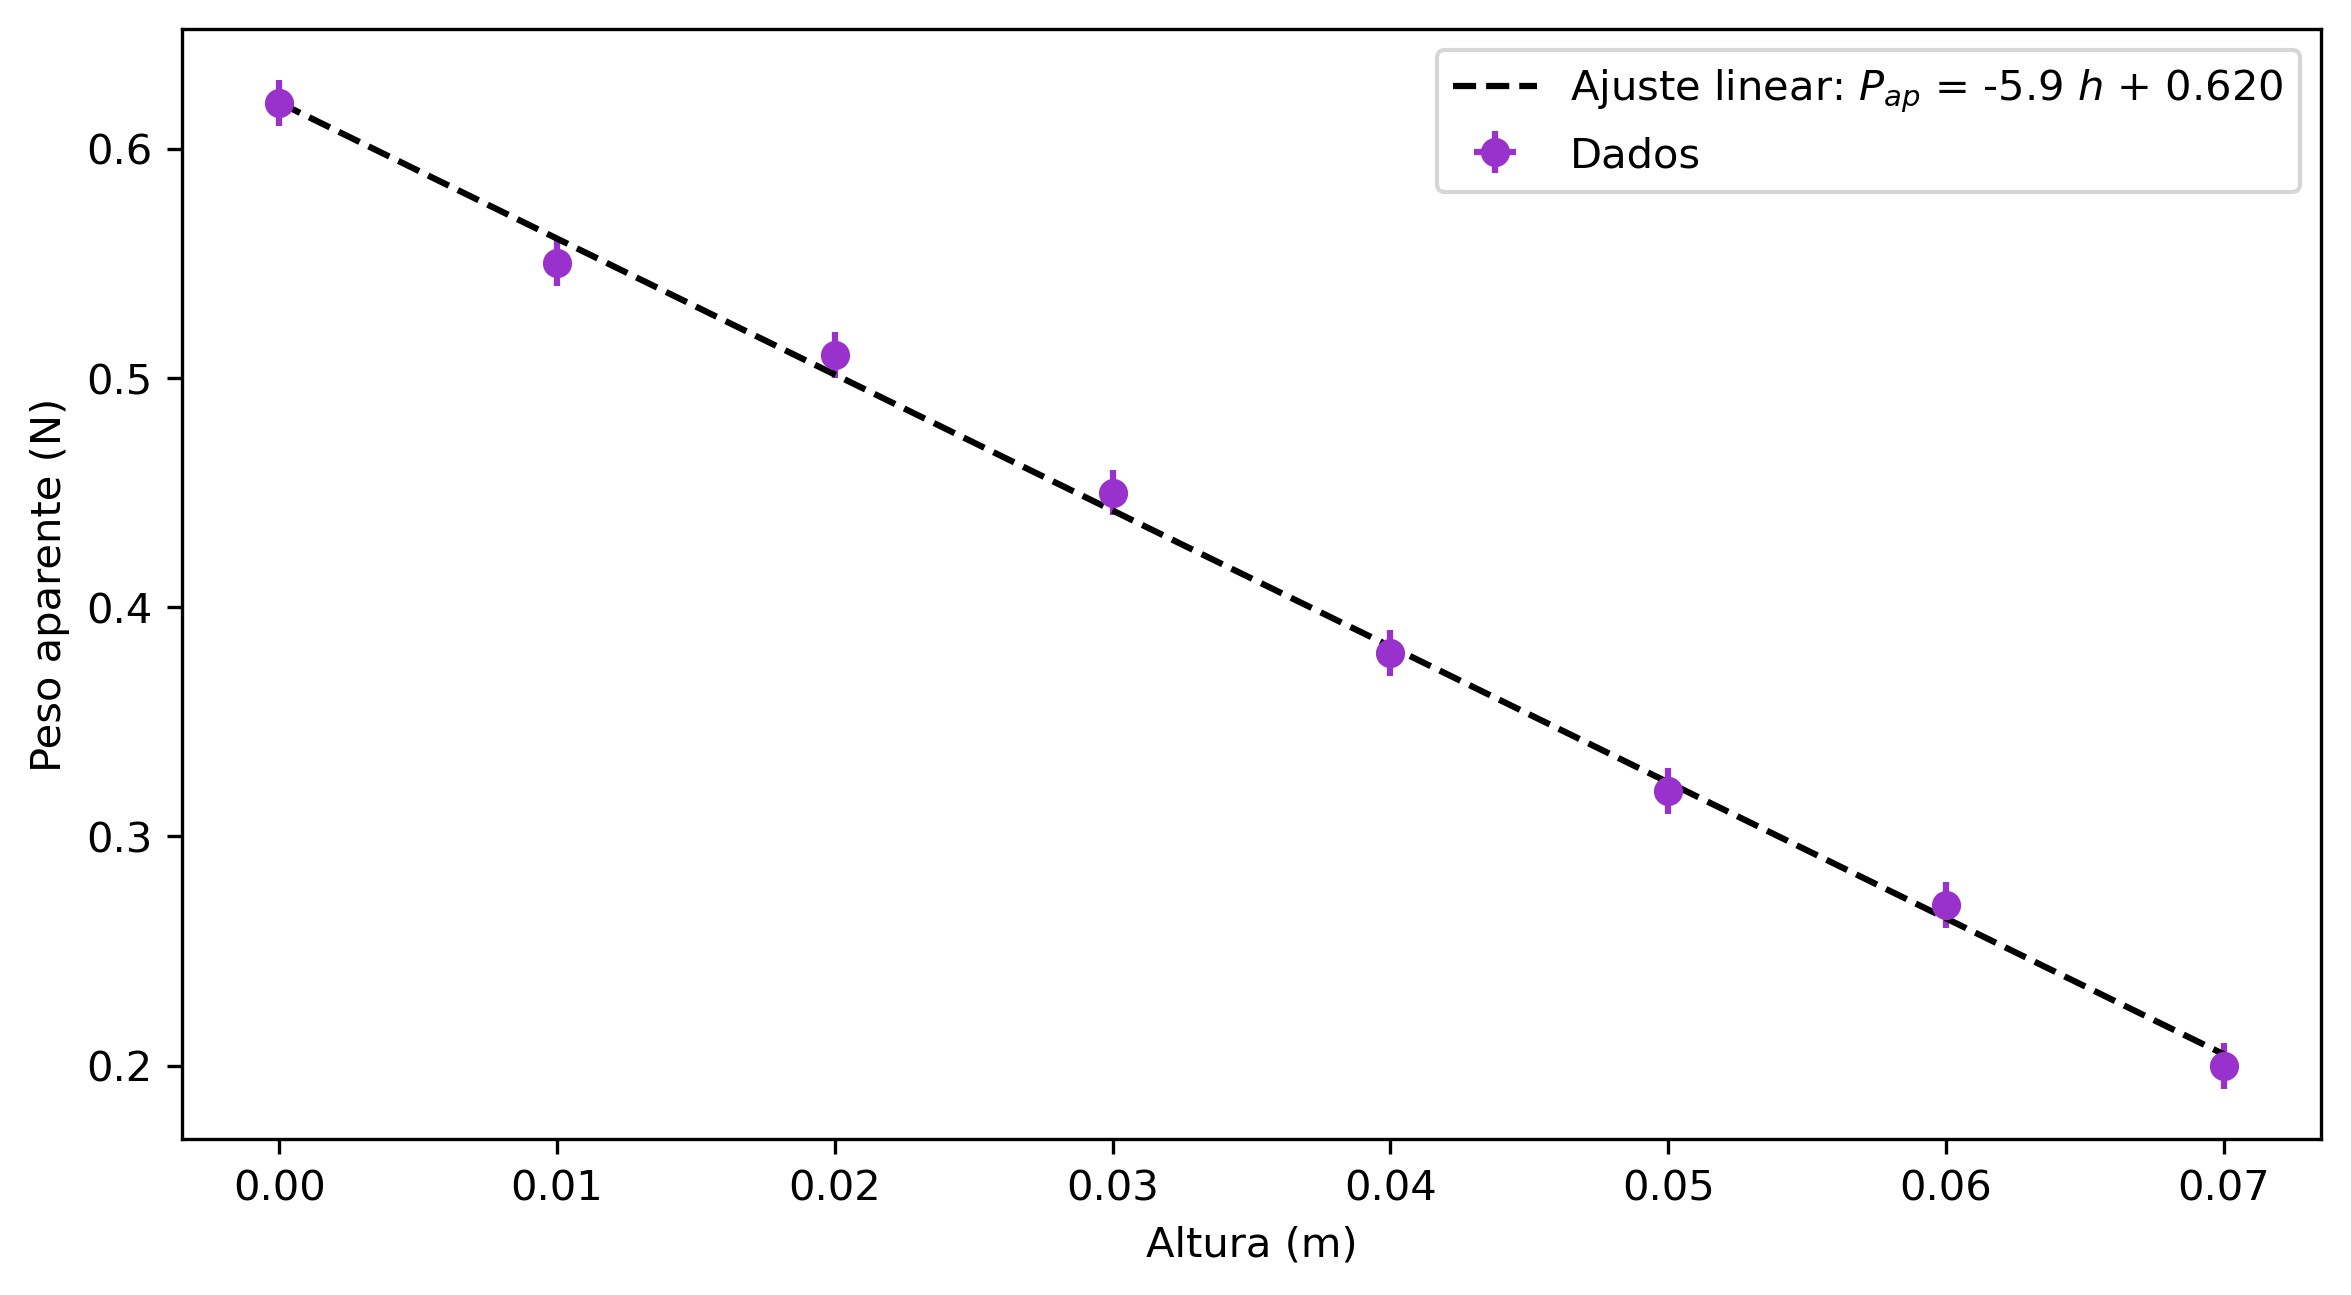

In [12]:
plt.figure(figsize = [9.2,4.9], dpi = 300) 
plt.errorbar(h,p_ap3,sigma_p_ap3_transf,0, 'o', color = 'darkorchid', label = 'Dados')
plt.plot(h,h*coef_angular + coef_linear, color ='black', ls = '--', label = r'Ajuste linear: $P_{ap}$ = %.1f $h$ + %.3f' % (coef_angular,abs(coef_linear)))
plt.xlabel('Altura (m)')
plt.ylabel(r'Peso aparente (N)')
plt.legend()
plt.savefig('Pxh_ajuste.pdf', dpi =300)
plt.show()

## Gráfico de resíduos

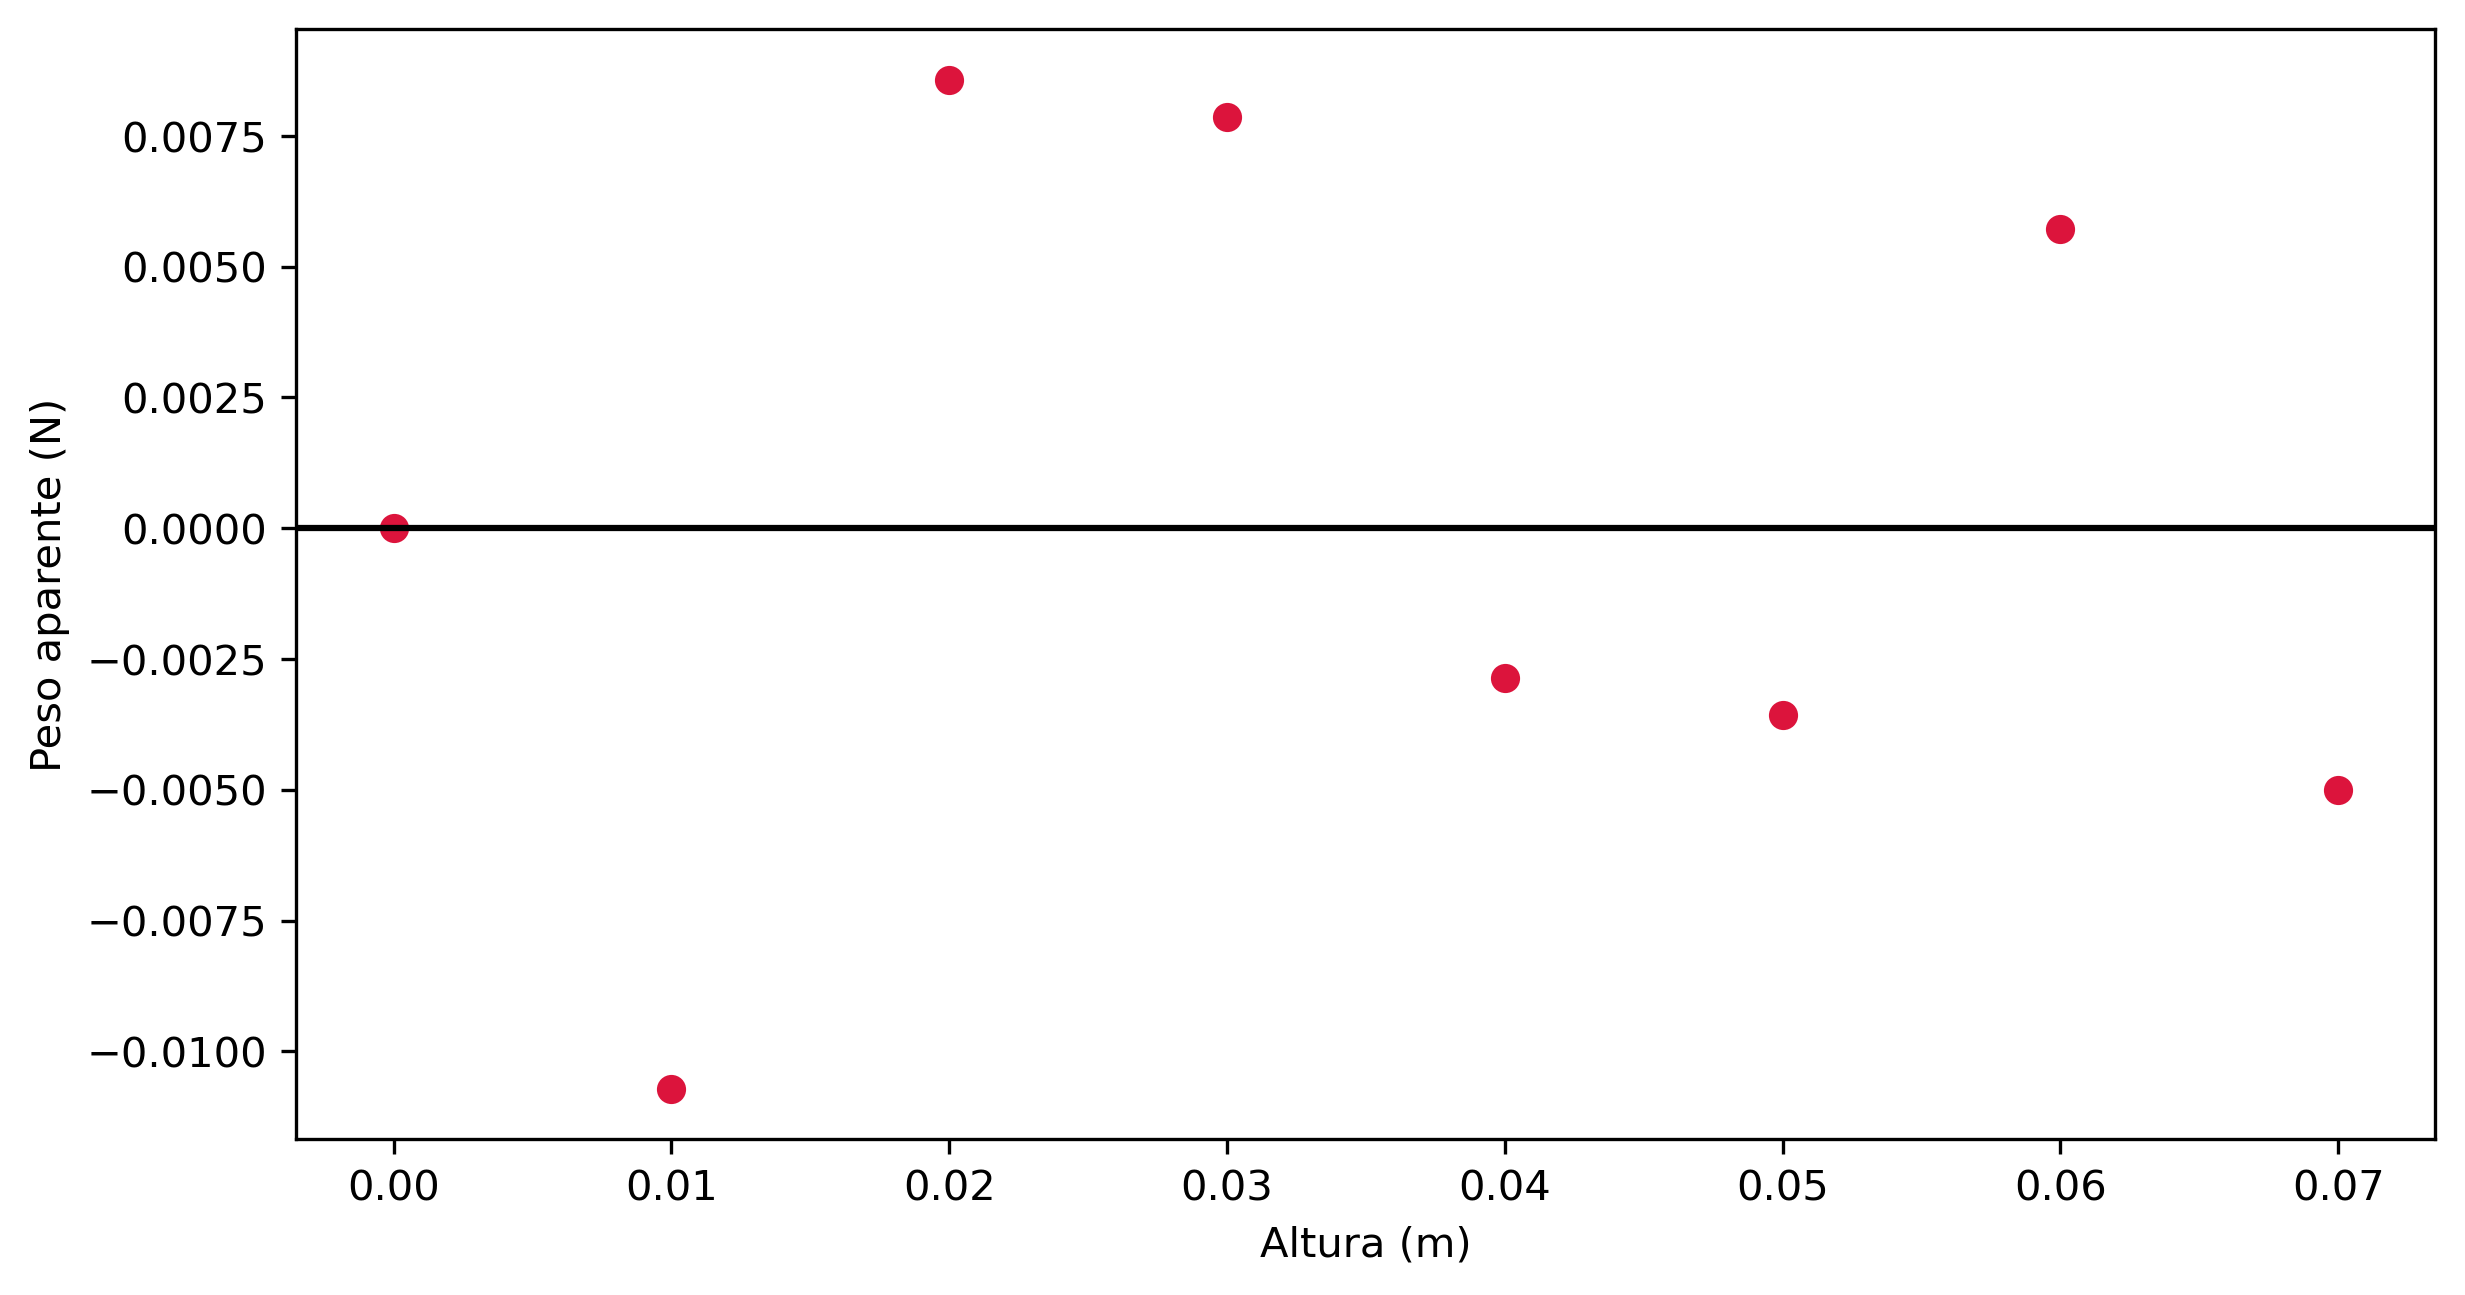

In [17]:
plt.figure(figsize = [9.2,4.9], dpi = 300) 
plt.scatter(h,(p_ap3-h*coef_angular - coef_linear), color = 'crimson')
plt.axhline(y=0, color='k', linestyle='-')
plt.ylabel("Peso aparente (N)")
plt.xlabel('Altura (m)')
plt.savefig('Pxh_Residuos.pdf', dpi =300)
plt.show()

## interpretando os coeficientes fisicamente

O peso aparente é a diferença entre o peso do cilíndro e a força de empuxo:

$$P_{ap} = P - F_E$$

Pelo princípio de Arquimedes, o módulo a força de empuxo é igual ao peso do volume de líquido deslocado, isto é,  $F_E = \rho_l V_{ld} g$. No entanto, pelo princípio de impenetrabilidade da matéria, o volume deslocado é igual ao volume submerso do cilíndro, ou seja, $V_{ld} = V_s = A h$. Portanto: 

$$P_{ap} = P - \rho_l A g h$$

Comparando com o ajuste linear obtido, $P_{ap} = c h + d$, nós vemos que:

$$d = P$$
$$c = -\rho_l A g$$

Isolando $\rho_l$ na última equação:

$$\rho_l = -\frac{c}{Ag}$$

Para obtermos a incerteza associada a densidade, devemos propagar os erros de $c$ e $A$ da seguinte forma:

$$\sigma_{\rho_l} = \sqrt{\left(\frac{\partial \frac{c}{Ag}}{\partial c}\right)^2\sigma_{c}^2 + \left(\frac{\partial \frac{c}{Ag}}{\partial A}\right)^2\sigma_{A}^2}$$

$$\sigma_{\rho_l} = \sqrt{\left( \frac{1}{Ag}\right)^2\sigma_{c}^2 + \left(\frac{c}{A^2g}\right)^2\sigma_{A}^2}$$

$$\sigma_{\rho_l} = \frac{|c|}{Ag}\sqrt{\left( \frac{\sigma_{c}}{c}\right)^2 + \left(\frac{\sigma_{A}}{A}\right)^2}$$

$$\sigma_{\rho_l} = \rho_l\sqrt{\left( \frac{\sigma_{c}}{c}\right)^2 + \left(\frac{\sigma_{A}}{A}\right)^2}$$

Utilizando a área que já calculamos e $c = (-5.9 \pm 0.1)$ N/m:

In [13]:
rho_l = -coef_angular/(area*g)

sigma_rho_l = rho_l*np.sqrt(np.power(sigma_angular/coef_angular,2) + np.power(sigma_area/area,2))
sigma_rho_l = float('{:g}'.format(float('{:.1g}'.format(sigma_rho_l))))

rho_l = np.round(rho_l,-1)
print('rho_l = (%.0f +- %.0f) kg/m^3' % (rho_l,sigma_rho_l))

rho_l = (730 +- 30) kg/m^3


In [14]:
print(1-730/1000)

0.27


In [15]:
x = np.sqrt(4*50e-6/(np.pi*7e-2))
x = np.round(x,4)
print(x)

0.0302
